<a href="https://colab.research.google.com/github/henney3765/MLDL_studyalone/blob/main/07_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%9D%84%EC%8B%9C%EC%9E%91%ED%95%A9%EB%8B%88%EB%8B%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 07-1 인공신경망

## 패션 MNIST

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
# 훈련 세트 크기 확인
print(train_input.shape, train_target.shape)

(60000, 28, 28) (60000,)


In [ ]:
# 테스트 세트 크기 확인
print(test_input.shape, test_target.shape)

(10000, 28, 28) (10000,)


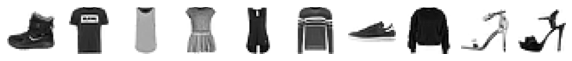

In [ ]:
import matplotlib.pyplot as plt

# 샘플 출력
fig, axs = plt.subplots(1, 10, figsize=(10,10))
for i in range(10):
  axs[i].imshow(train_input[i], cmap='gray_r')
  axs[i].axis('off')
plt.show()

In [ ]:
print([train_target[i] for i in range(10)])

[9, 0, 0, 3, 0, 2, 7, 2, 5, 5]


In [ ]:
import numpy as np
print(np.unique(train_target, return_counts=True))

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000]))


In [ ]:
# 0~1 사이의 값으로 정규화
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)

In [ ]:
print(train_scaled.shape)

(60000, 784)


In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=5, random_state=42)
scores = cross_validate(sc, train_scaled, train_target, n_jobs=-1)
print(np.mean(scores['test_score']))

0.8195666666666668


## 인공 신경망

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn.model_selection import train_test_split
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [ ]:
print(train_scaled.shape, train_target.shape)

(48000, 784) (48000,)


In [ ]:
print(val_scaled.shape, val_target.shape)

(12000, 784) (12000,)


In [ ]:
# 밀집층(완전 연결층) 생성
dense = keras.layers.Dense(10, activation='softmax', input_shape=(784,))

In [ ]:
model = keras.Sequential(dense)

## 인공 신경망으로 패션 아이템 분류하기

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 2ms/step - loss: 0.6066 - accuracy: 0.7940
Epoch 2/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4783 - accuracy: 0.8379
Epoch 3/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4561 - accuracy: 0.8480
Epoch 4/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4440 - accuracy: 0.8521
Epoch 5/5
1500/1500 [==============================] - 3s 2ms/step - loss: 0.4366 - accuracy: 0.8554


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.4515 - accuracy: 0.8482


[0.4515373110771179, 0.8482499718666077]

# 07-2 심층 신경망

In [ ]:
from tensorflow import keras
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [ ]:
from sklearn.model_selection import train_test_split
train_scaled = train_input / 255.0
train_scaled = train_scaled.reshape(-1, 28*28)
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [ ]:
dense1 = keras.layers.Dense(100, activation='sigmoid', input_shape=(784,))
dense2 = keras.layers.Dense(10, activation='softmax')

In [ ]:
model = keras.Sequential([dense1, dense2])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


## 층을 추가하는 다른 방법

In [ ]:
model = keras.Sequential([
                          keras.layers.Dense(100, activation='sigmoid', input_shape=(784,),
                                             name='hidden'),
                          keras.layers.Dense(10, activation='softmax', name='output')
], name='패션 MNIST 모델')

In [ ]:
model.summary()

Model: "패션 MNIST 모델"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hidden (Dense)              (None, 100)               78500     
                                                                 
 output (Dense)              (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# add() 매서드를 통한 모델 생성
model = keras.Sequential()
model.add(keras.layers.Dense(100, activation='sigmoid', input_shape=(784,)))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               78500     
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 6s 3ms/step - loss: 0.5646 - accuracy: 0.8072
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4079 - accuracy: 0.8540
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3738 - accuracy: 0.8644
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3524 - accuracy: 0.8716
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3337 - accuracy: 0.8786


## 렐루(ReLU) 함수

In [ ]:
# Flatten 매서드를 통해 전처리 과정을 모델에 포함
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28, 28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 100)               78500     
                                                                 
 dense_6 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 데이터 다시 준비
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5321 - accuracy: 0.8129
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3919 - accuracy: 0.8585
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3543 - accuracy: 0.8731
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3310 - accuracy: 0.8808
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3161 - accuracy: 0.8887


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3989 - accuracy: 0.8684


[0.3989000916481018, 0.8684166669845581]

## 옵티마이저

In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD()
model.compile(optimizer=sgd, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
sgd = keras.optimizers.SGD(learning_rate=0.1)

In [ ]:
# 네스테로프 모멘텀 최적화
sgd = keras.optimizers.SGD(momentum=0.9, nesterov=True)

In [ ]:
# 적응적 학습률
adagrad = keras.optimizers.Adagrad()
model.compile(optimizer=adagrad, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
rmsprop = keras.optimizers.RMSprop()
model.compile(optimizer=rmsprop, loss='sparse_categorical_crossentropy', metrics='accuracy')

In [ ]:
# adam을 활용하여 MNIST 다시 학습
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
model.fit(train_scaled, train_target, epochs=5)

Epoch 1/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5197 - accuracy: 0.8198
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3882 - accuracy: 0.8611
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3514 - accuracy: 0.8725
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3248 - accuracy: 0.8806
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3065 - accuracy: 0.8873


In [ ]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3365 - accuracy: 0.8780


[0.3364574909210205, 0.878000020980835]

# 07-3 신경망 모델 훈련

## 손실 곡선

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

4431872/4422102 [==============================] - 0s 0us/step


In [4]:
def model_fn(a_layer=None):
  model = keras.Sequential()
  model.add(keras.layers.Flatten(input_shape=(28,28)))
  model.add(keras.layers.Dense(100, activation='relu'))
  if a_layer:
    model.add(a_layer)
  model.add(keras.layers.Dense(10, activation='softmax'))
  return model

In [5]:
model = model_fn()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 100)               78500     
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=5, verbose=0)

In [7]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


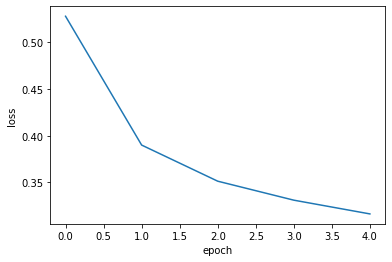

In [8]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

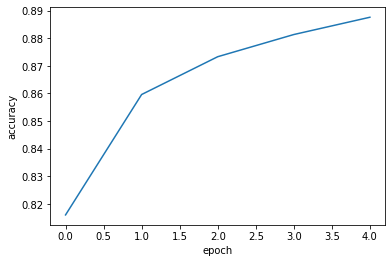

In [9]:
plt.plot(history.history['accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.show()

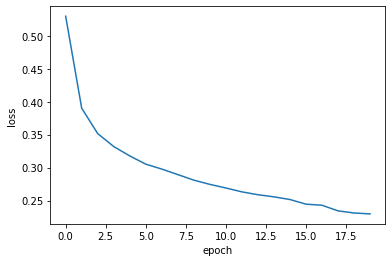

In [11]:
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0)
plt.plot(history.history['loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [12]:
# validation_data 파라미터에 튜플형식으로 검증 데이터를 넣으면 된다.
model = model_fn()
model.compile(loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))

In [13]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


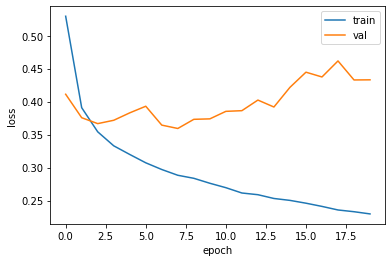

In [14]:
# validation data loss까지 추가하여 그래프 생성
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

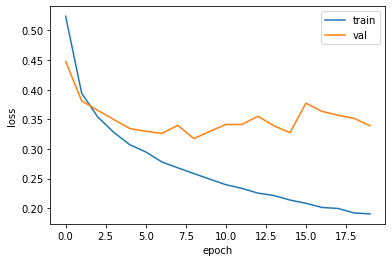

In [15]:
# 옵티마이저를 adam으로 하여 모델 학습
model = model_fn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()
# 학습률을 조절하면 더 나은 손실 곡선을 얻을 수도 있음

Epoch 1/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5672 - accuracy: 0.8067 - val_loss: 0.4826 - val_accuracy: 0.8285
Epoch 2/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4183 - accuracy: 0.8535 - val_loss: 0.3968 - val_accuracy: 0.8608
Epoch 3/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3778 - accuracy: 0.8670 - val_loss: 0.3718 - val_accuracy: 0.8673
Epoch 4/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3520 - accuracy: 0.8750 - val_loss: 0.3566 - val_accuracy: 0.8745
Epoch 5/20
1500/1500 [==============================] - 4s 2ms/step - loss: 0.3284 - accuracy: 0.8823 - val_loss: 0.3481 - val_accuracy: 0.8766
Epoch 6/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3137 - accuracy: 0.8860 - val_loss: 0.3406 - val_accuracy: 0.8788
Epoch 7/20
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3009 - accuracy: 0.8907 - val_loss: 0.3350 - val_accuracy:

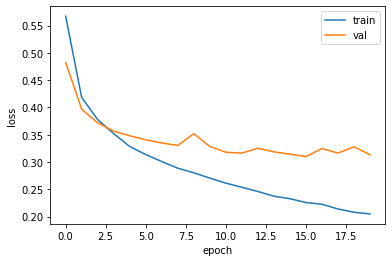

In [18]:
# adam의 learning_rate를 바꿔서 모델 학습(adam default=0.001)
model = model_fn()
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0005), loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=1,
                    validation_data=(val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 드롭아웃

In [19]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_9 (Flatten)         (None, 784)               0         
                                                                 
 dense_16 (Dense)            (None, 100)               78500     
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_17 (Dense)            (None, 10)                1010      
                                                                 
Total params: 79,510
Trainable params: 79,510
Non-trainable params: 0
_________________________________________________________________


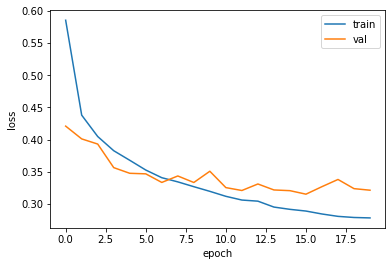

In [20]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data = (val_scaled, val_target))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

## 모델 저장과 복원

In [21]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
history = model.fit(train_scaled, train_target, epochs=10, verbose=0,
                    validation_data = (val_scaled, val_target))

In [22]:
# 모델 파라미터 저장
model.save_weights('model-weights.h5')

In [23]:
# 모델 구조와 모델 파라미터를 함께 저장
model.save('model-whole.h5')

In [24]:
# 확인
!ls -al *.h5

-rw-r--r-- 1 root root 333448 Jan 17 08:08 model-weights.h5
-rw-r--r-- 1 root root 982664 Jan 17 08:08 model-whole.h5


In [25]:
# 훈련 하지 않은 모델을 새로 만들고, 기존에 저장한 모델 파라미터를 적재
model = model_fn(keras.layers.Dropout(0.3))
model.load_weights('model-weights.h5')

# load_weights() 메서드를 사용하려면 save_weights() 메서드로 저장했던 모델과 정확히 같은 구조를 가져야 적재할 수 있음

In [26]:
import numpy as np
val_labels = np.argmax(model.predict(val_scaled), axis=-1)
print(np.mean(val_labels == val_target))

0.8798333333333334


In [27]:
# 모델 전체를 파일에서 읽은 다음 검증 세트의 정확도 출력
model = keras.models.load_model('model-whole.h5')
model.evaluate(val_scaled, val_target)

# load_model() 함수는 모델 파라미터뿐만 아니라 모델 구조와 옵티마이저 상태까지 모두 복원하기 때문에 evaluate()메서드를 사용할 수 있음

375/375 [==============================] - 1s 2ms/step - loss: 0.3280 - accuracy: 0.8798


[0.3280397057533264, 0.8798333406448364]

## 콜백

In [28]:
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
model.fit(train_scaled, train_target, epochs=20, verbose=0,
          validation_data=(val_scaled, val_target),
          callbacks=[checkpoint_cb])

In [29]:
model = keras.models.load_model('best-model.h5')
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8848


[0.3239157497882843, 0.8848333358764648]

In [32]:
# EarlyStopping
model = model_fn(keras.layers.Dropout(0.3))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,
                                                  restore_best_weights=True)
history = model.fit(train_scaled, train_target, epochs=20, verbose=0,
                    validation_data=(val_scaled, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

In [33]:
# 몇 번째 에포크에서 훈련이 중지되었는지 확인
print(early_stopping_cb.stopped_epoch)

# 에포크 횟수는 0부터 시작하기 때문에 10은 열한 번째 에포크에서 훈련이 중지된 것
# 따라서, patience를 2로 지정했기 때문에 최상의 모델은 아홉번 째 에포크일 것

10


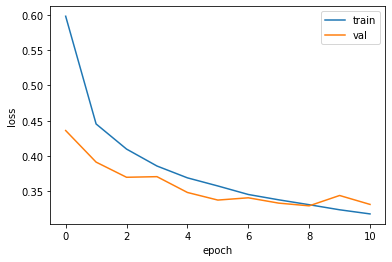

In [34]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [35]:
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.3295 - accuracy: 0.8812


[0.32954075932502747, 0.8811666369438171]